<a href="https://colab.research.google.com/github/NathaliaOliveir/CEE2/blob/main/Trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 1: Análise da Taxa SELIC com Python

**Curso**: Estatística UnB    
**Disciplina**: Computação Estatística 2 em Python    
**Aluna**: Nathalia Oliveira Moreira    
**Matrícula**: 200042289    
**Professora**: José Augusto Fiorucci     
**Data de Entrega**: 22 de junho de 2025

---

## Tema do Trabalho

Este relatório tem como objetivo utilizar a linguagem Python para acessar dados reais da Taxa SELIC através da API do Banco Central do Brasil, realizando análises e visualizações que ajudem a compreender o comportamento da economia brasileira ao longo do tempo.

---

## Introdução

A **Taxa SELIC** (Sistema Especial de Liquidação e Custódia) é a taxa básica de juros da economia brasileira, utilizada como principal instrumento de política monetária pelo Banco Central do Brasil. Essa taxa influencia diretamente as demais taxas de juros praticadas no mercado, como as cobradas em empréstimos, financiamentos e aplicações financeiras.

Em termos práticos, quando o Banco Central aumenta a SELIC, o objetivo principal é conter a inflação; por outro lado, quando a taxa é reduzida, busca-se estimular a economia, incentivando o consumo e o investimento.

Monitorar a evolução da SELIC ao longo do tempo é fundamental para entender o comportamento da economia brasileira, seus ciclos de crescimento e retração, e os impactos sobre a vida da população.

Neste relatório, utilizaremos a linguagem Python para acessar dados reais da Taxa SELIC disponibilizados pela API do Banco Central, realizar análises estatísticas e gerar visualizações gráficas.


In [7]:
!pip install mplcyberpunk
!pip install python.bcb
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install seaborn

In [8]:
import matplotlib as mpl
import mplcyberpunk
from bcb import currency
from bcb import sgs
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime
from datetime import timedelta
import pandas as pd

plt.style.use("cyberpunk")

In [9]:
selic= sgs.get({'selic':432}, start='2019-01-01')
#Não coloquei a taxa do trabalho por que tem um limite de tempo de 10 anos para os dados

In [35]:
selic['selic'] = selic['SELIC Diária (%)'] / 100

# Calculando SELIC Anual e Acumulada
selic['SELIC Anual (%)'] = (1 + selic['selic']).pow(252) - 1
selic['SELIC Acumulada (%)'] = (1 + selic['selic']).cumprod() - 1

# Convertendo tudo para porcentagem com 6 casas decimais
selic['SELIC Diária (%)'] = selic['selic'] * 100
selic['SELIC Anual (%)'] = selic['SELIC Anual (%)'] * 100
selic['SELIC Acumulada (%)'] = selic['SELIC Acumulada (%)'] * 100

# Selecionando colunas finais e formatando datas
selic = selic[['SELIC Diária (%)', 'SELIC Anual (%)', 'SELIC Acumulada (%)']]
selic.index.name = 'Datas'

# Exibindo a tabela final
print(selic.head())

            SELIC Diária (%)  SELIC Anual (%)  SELIC Acumulada (%)
Datas                                                             
01/01/2019               6.5     7.800117e+08             6.500000
02/01/2019               6.5     7.800117e+08            13.422500
03/01/2019               6.5     7.800117e+08            20.794962
04/01/2019               6.5     7.800117e+08            28.646635
05/01/2019               6.5     7.800117e+08            37.008666


In [36]:
selic.index = pd.to_datetime(selic.index, format='%d/%m/%Y')

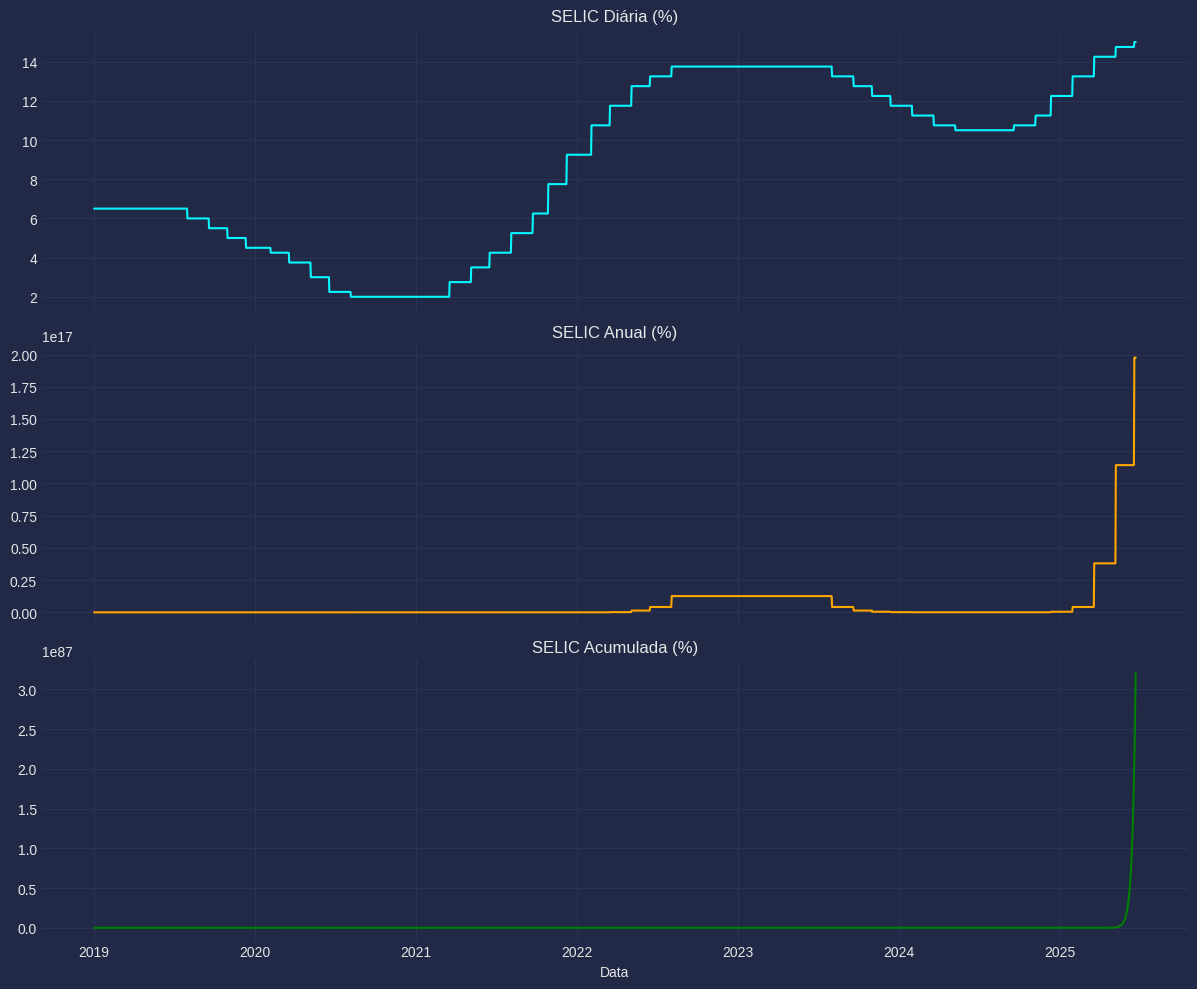

In [40]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

axs[0].plot(selic.index, selic['SELIC Diária (%)'])
axs[0].set_title('SELIC Diária (%)')
axs[0].grid(True)

axs[1].plot(selic.index, selic['SELIC Anual (%)'], color='orange')
axs[1].set_title('SELIC Anual (%)')
axs[1].grid(True)

axs[2].plot(selic.index, selic['SELIC Acumulada (%)'], color='green')
axs[2].set_title('SELIC Acumulada (%)')
axs[2].set_xlabel('Data')
axs[2].grid(True)

plt.tight_layout()
plt.show()